In [ ]:
from IPython.display import display
import pandas as pd

def VegaLite(spec):
    bundle = {}
    bundle['application/vnd.vegalite.v4+json'] = spec
    display(bundle, raw=True)

In [179]:
import json

with open("data/import_export_ports_francs.json", "r") as f:
    data = json.load(f)

In [ ]:
data_dk = {"Dunkerque": data}

In [ ]:
VegaLite({
  "title": "Répartition des imports/exports de Dunkerque en 1789 par produits (SITC simpl)",
  "data": {"values": data},
  "mark": {"type":"bar", "tooltip": {"content": "data"}},
  "encoding": {
    "x": {"field": "value", "type": "quantitative", "title": "Valeur (Lt)"},
    "column": {"field": "group"},
    "y": {"field": "product", "sort": "-x", "title": "Produits"},
    "color": {"field": "partner"}
  }
})

In [ ]:
def pyramide_port_franc(port_franc, data):
    report = data[port_franc]
    VegaLite({
      "title": "Répartition des imports/exports de {} en 1789 par produits (SITC simpl)".format(port_franc),
      "data": {"values": report},
      "spacing": 0,
      "hconcat": [{
        "transform": [{
          "filter": {"field": "group", "equal": "import"}
        }],
        "title": "import",
        "mark": {"type":"bar", "tooltip": {"content": "data"}},
        "encoding": {
          "y": {
            "field": "product", "title": None, "sort": "-x"
          },
          "x": {
            "field": "value",
            "type": "quantitative",
            "title": "Valeur (Lt)",
              "sort": "descending"
          },
          "color": {
            "field": "partner",
          }
        }
      },
      {
        "transform": [{
          "filter": {"field": "group", "equal": "export"}
        }],
        "title": "export",
        "mark": {"type":"bar", "tooltip": {"content": "data"}},
        "encoding": {
          "y": {
            "field": "product", "sort": "-x", "title": None, "axis": None

          },
          "x": {
            "field": "value",
            "type": "quantitative",
            "title": "Valeur (Lt)",
            "sort": "ascending"
          },
          "color": {
            "field": "partner",
          }
        }
      },
      {
      "title": "valeurs totales",
      "mark": {"type":"bar", "tooltip": {"content": "data"}},
      "encoding": {
        "x": {"field": "value", "type": "quantitative", "title": "Valeur (Lt)"},
        "y": {"field": "partner", "sort": "-x", "title": "Partner"},
        "color": {"field": "partner"},
        "column": {"field": "group"},
      }
      }
      ]
    }
    )

In [ ]:
pyramide_port_franc("Dunkerque", data_dk)

In [186]:
def pyramide_port_franc(port_franc, data):
    report = data[port_franc]
    VegaLite({
      "title": "Répartition des imports/exports de {} en 1789 par produits (SITC simpl)".format(port_franc),
      "data": {"values": report},
      "spacing": 0,
      "vconcat": [{"hconcat": [{
            "transform": [{
              "filter": {"field": "group", "equal": "import"}
            }],
            "title": "import",
            "mark": {"type":"bar", "tooltip": {"content": "data"}},
            "encoding": {
              "y": {
                "field": "product", "title": None, "sort": "-x"
              },
              "x": {
                "field": "value",
                "type": "quantitative",
                "title": "Valeur (Lt)",
                  "sort": "descending"
              },
              "color": {
                "field": "partner",
              }
            }
          },
          {
            "transform": [{
              "filter": {"field": "group", "equal": "export"}
            }],
            "title": "export",
            "mark": {"type":"bar", "tooltip": {"content": "data"}},
            "encoding": {
              "y": {
                "field": "product", "sort": "-x", "title": None, "axis": None

              },
              "x": {
                "field": "value",
                "type": "quantitative",
                "title": "Valeur (Lt)",
                "sort": "ascending"
              },
              "color": {
                "field": "partner",
              }
            }
          }
          ]}, {"hconcat": [{
            "transform": [
                {
              "filter": {"field": "group", "equal": "import"}
            },
            {
                  "aggregate": [{
                   "op": "sum",
                   "field": "value",
                   "as": "total_value"
                  }],
                  "groupby": ["partner"]
            }
            ],
            "mark": {"type":"bar", "tooltip": {"content": "data"}},
            "encoding": {
              "y": {
                "field": "partner", "title": None
              },
              "x": {
                "field": "total_value",
                "type": "quantitative",
                "title": "Valeur tous produits (Lt)",
                  "sort": "descending"
              },
              "color": {
                "field": "partner",
              }
            }
          },
          {
            "transform": [
                {
              "filter": {"field": "group", "equal": "export"}
            },
            {
                  "aggregate": [{
                   "op": "sum",
                   "field": "value",
                   "as": "total_value"
                  }],
                  "groupby": ["partner"]
            }
            ],
            "mark": {"type":"bar", "tooltip": {"content": "data"}},
            "encoding": {
              "y": {
                "field": "partner", "title": None, "axis": None
              },
              "x": {
                "field": "total_value",
                "type": "quantitative",
                "title": "Valeur tous produits (Lt)",
                "sort": "ascending"
              },
              "color": {
                "field": "partner",
              }
            }
          }
          ]}
        ]
    }
    )

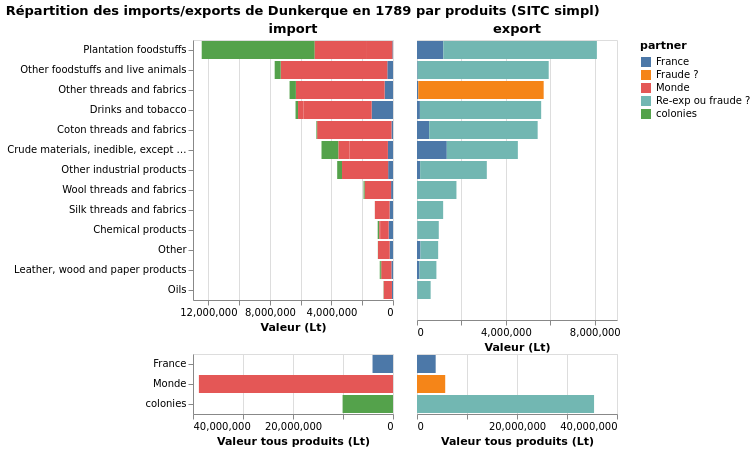

In [187]:
pyramide_port_franc("Dunkerque", data)

In [ ]:
ajouter la valeur totale pour tout le graphique pour chacun des 5 (6 avecceux dont on est sûrs que c'est de la fraude) partners
entrepôt ou fraude (résidu) - pour la première ligne c'est sûr que c'est de la fraude
regarder navigo :peut-on distinguer entre entrepôt légitime et fraude ? Y a-t-il suffisamment de navires (quel tonnage ?) qui partent avec ce genre de produits ?  --> voir qui travaille là-dessus
pour les autres ports francs on a les exports, donc pas besoin de calculer un résidu  --> plus facile de distinguer la fraude de l'entrepôt
regarder quand commence cet entrepôt / fraude --> lire la thèse de Christian p. 167 - 169, d'après Christian on pourrait mettre en évidence que ça commence vers 1730
Plusieurs séries temporelles ?

In [ ]:
VegaLite({
  "title": "**************************************",
  "data": {"values": report_dk},
  "transform": [{
      "aggregate": [{
       "op": "sum",
       "field": "value",
       "as": "total_product"
      }],
      "groupby": ["partner"]
  }],
  "mark": {"type":"bar", "tooltip": {"content": "data"}},
  "encoding": {
    "x": {"field": "total_product", "type": "quantitative", "title": "Valeur (Lt)"},
    "y": {"field": "partner", "sort": "-x", "title": "Partner"},
    "color": {"field": "partner"}
  }
})